In [1]:
import sys
import os
script_dir = os.path.abspath(os.path.join('..', '..', 'numpy', '1D'))
sys.path.append(script_dir)

In [2]:
from utils import *
from env import *
from model import *
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt

In [ ]:
# set directory to folder with model trained with different place field parameter combinations
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/1D/"

In [ ]:
def get_frequency(allcoords, trial, gap=50):
    xs = np.linspace(-1,1,1001)
    fx = []
    for g in range(gap):
        fx.append(allcoords[trial-1-g])
    fx = np.array(flatten(fx))
    kde = gaussian_kde(fx.reshape(-1))
    fx_smooth = kde(xs)
    px = fx_smooth/np.sum(fx_smooth)
    return px

def plot_data_in_axes(ax_top, ax_bottom, xs, pcacts, dx,dx2, fx, goalcoord, startcoord, goalsize, envsize, title, sign, name):
    # Plot data in bottom axis
    cmap = cm.viridis
    num_curves = pcacts.shape[1]
    for i in range(num_curves):
        color = cmap(i / num_curves)
        ax_bottom.plot(xs, pcacts[:, i], color=color, zorder=1)

    ax3 = ax_bottom.twinx()
    ax3.plot(xs, np.mean(pcacts,axis=1),color='r',zorder=2)
    ax3.set_ylabel('$\sum \phi(x)$',color='r')
    ax3.axvline(xs[np.argmax(np.round(np.mean(pcacts,axis=1),8))], color='r', linestyle='--')
    ax3.set_yticks([])

    max_val = np.maximum(pcacts.max(), 1)
    ax_bottom.set_ylabel(f'${sign}(x)$')  # Set y label with minimal padding
    # ax_bottom.set_xlabel('$x$')
    ax_bottom.fill_between(xs, reward_func(xs, goalcoord, goalsize), color='red', alpha=0.25, label='Target', zorder=2)
    ax_bottom.axvline(startcoord[0], ymin=0, ymax=max_val, color='g', linestyle='--', label='Start', linewidth=2, zorder=2)
    ax_bottom.hlines(xmin=-envsize, xmax=envsize, y=0, colors='k', zorder=2)
    ax_bottom.spines['top'].set_visible(False)  # Remove the top axis line for ax_bottom

    ax_bottom.set_xticks([])
    ax_bottom.set_ylim([0.0,max_val])

    ax2 = ax_top.twinx()
    dx2 /= np.max(dx2)
    ax2.set_ylabel(f'$gKDE(COM)$', color='b')
    ax2.plot(xs, dx2, color='b', zorder=2)
    ax2.axvline(xs[np.argmax(np.round(dx2,8))], color='b', linestyle='--')

    ax_top.set_xticks([])  # Remove x axis ticks on top axis
    ax_top.set_title(title)  # Set the title for the top plot
    ax_top.spines['bottom'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    
    ax_bottom.axhline(y=max_val, color='gray', linestyle='--', linewidth=0.5)

    ax_top.plot(xs, fx, color='k', zorder=1)
    ax_top.axvline(xs[np.argmax(fx)], color='k', linestyle='--')
    ax_top.set_ylabel(name)  # Set y label with minimal padding

    # Move y label to top
    # ax_top.yaxis.set_label_position('right')  # Change the label position to the right
    # ax_top.yaxis.set_label_coords(1.05, 0.5)  # Adjust coordinates

    # Use scientific notation for y-ticks
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax_bottom.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax_top.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax_top.set_yticks([])  # Remove x axis ticks on top axis
    ax2.set_yticks([])  # Remove x axis ticks on top axis
    ax_bottom.set_yticks([])  # Remove x axis ticks on top axis

def main_plot(allcoords,logparams, trials,parameter,ax, goalcoord=[0.5], startcoord=[-0.75], goalsize=0.05, envsize=1):
    
    num_plots = len(trials)

    xs = np.linspace(-1, 1, 1001)
    
    plt.subplots_adjust(wspace=0.5 )
    for i in range(num_plots):
        
        # Create top and bottom inset axes
        gs_main = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=ax[i], height_ratios=[1, 1], hspace=0.0)
        ax_top = plt.subplot(gs_main[0])
        ax_bottom = plt.subplot(gs_main[1])

        # Get data for the current trial
        fx = get_frequency(allcoords, trials[i], gap=50)
        pcacts = predict_batch_placecell(logparams[trials[i]], xs)
        sign = '\phi'
        name = '$p_{RM}(x)$'

        dx = np.mean(pcacts, axis=1)
        com = xs[np.argmax(pcacts,axis=0)]
        kde = gaussian_kde(com,bw_method=1/5)
        ds2 = kde(xs)
        
        # Plot data
        plot_data_in_axes(ax_top, ax_bottom, xs, pcacts, dx,ds2,fx, goalcoord, startcoord, goalsize, envsize, title=parameter+f"T={trials[i]}", sign=sign, name=name)

    # Shared title for the entire figure
    # f.tight_layout()
    


/var/folders/9w/2t7dk80j0vncsnz93dbrg1080000gp/T/ipykernel_87269/3500531267.py:92: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_top = plt.subplot(gs_main[0])


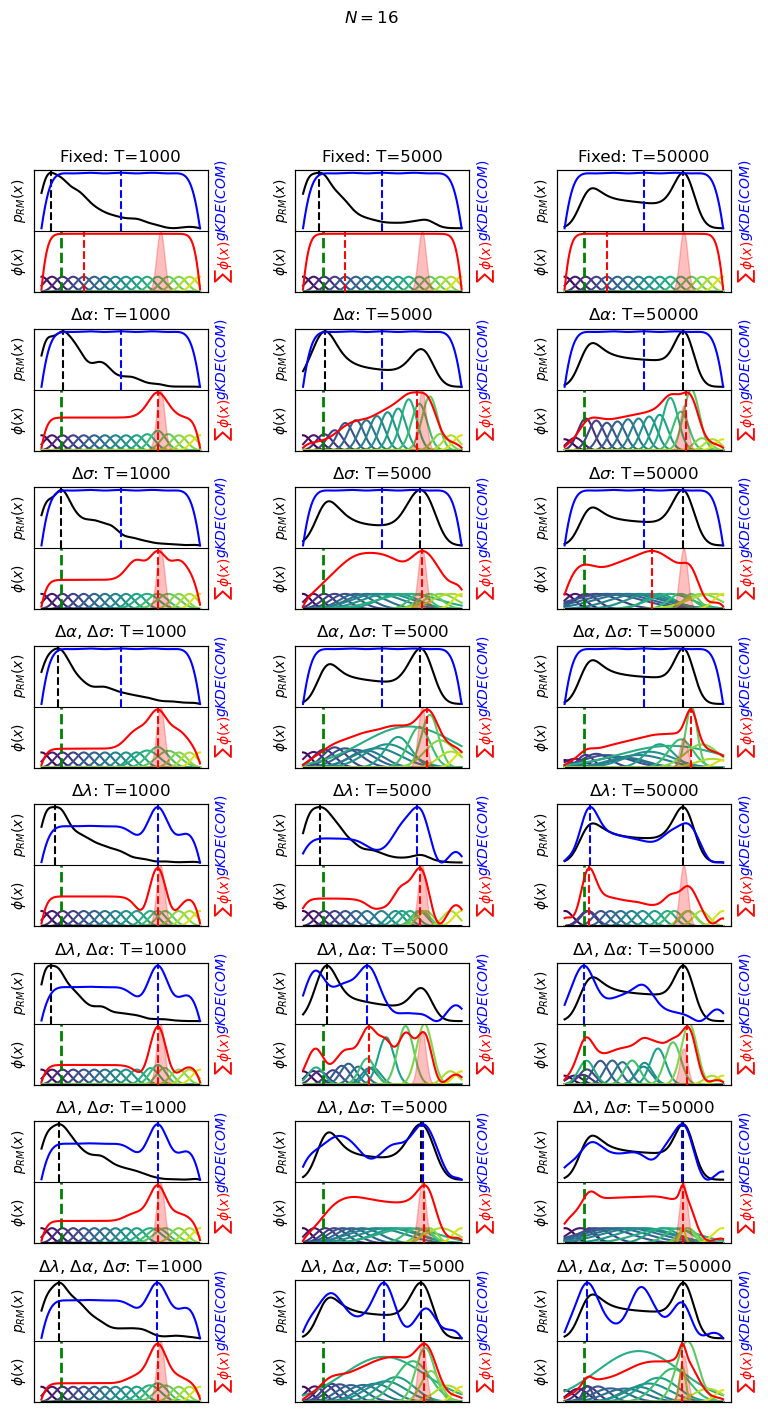

In [9]:
npc = 16

# plot example field 
f,ax = plt.subplots(8,3,figsize=(3*3,8*2)) 
f.suptitle(f'$N={npc}$')
# f.suptitle(f'$N={len(logparams[0][0])}$')
plt.subplots_adjust(hspace=0.3) 
ltypes = [0.0, 0.0001]
trials = [1000, 5000, 50000]
pcinit = 'uni'
names_dict = {'llr': r'$\Delta\lambda$', 'alr': r'$\Delta\alpha$', 'slr': r'$\Delta\sigma$'}
i = 0
for llr in ltypes:
    for slr in ltypes:
        for alr in ltypes:

            try:
                exptname = f"/data/dx_data/full_1D_td_online_0.0ns_0p_{npc}n_0.01plr_0.01clr_{llr}llr_{alr}alr_{slr}slr_uni_0.5a_0.1s_0s_50000e_5rmax_0.05rsz"
                [logparams, latencys,cum_rewards, allcoords] = saveload(data_dir + exptname,1,"load")
                
                name_components = []
                if llr > 0:
                    name_components.append(names_dict['llr'])
                if alr > 0:
                    name_components.append(names_dict['alr'])
                if slr > 0:
                    name_components.append(names_dict['slr'])
                name = ', '.join(name_components) if name_components else 'Fixed'
                
                main_plot(allcoords, logparams, trials, parameter=name+': ', ax=ax[i])
                
                if i < 7:
                    for j in range(len(trials)):
                        ax[i,j].set_xticks([])
                        ax[i,j].set_xlabel([])
                i+=1

                # f.savefig(f'./svgs/1D_{pcinit}_{name}.svg')

            except FileNotFoundError: print('skip')
# f.tight_layout()
# f.savefig('./svgs/1D_field_dx_all_256.svg')

/var/folders/9w/2t7dk80j0vncsnz93dbrg1080000gp/T/ipykernel_87269/3500531267.py:92: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_top = plt.subplot(gs_main[0])


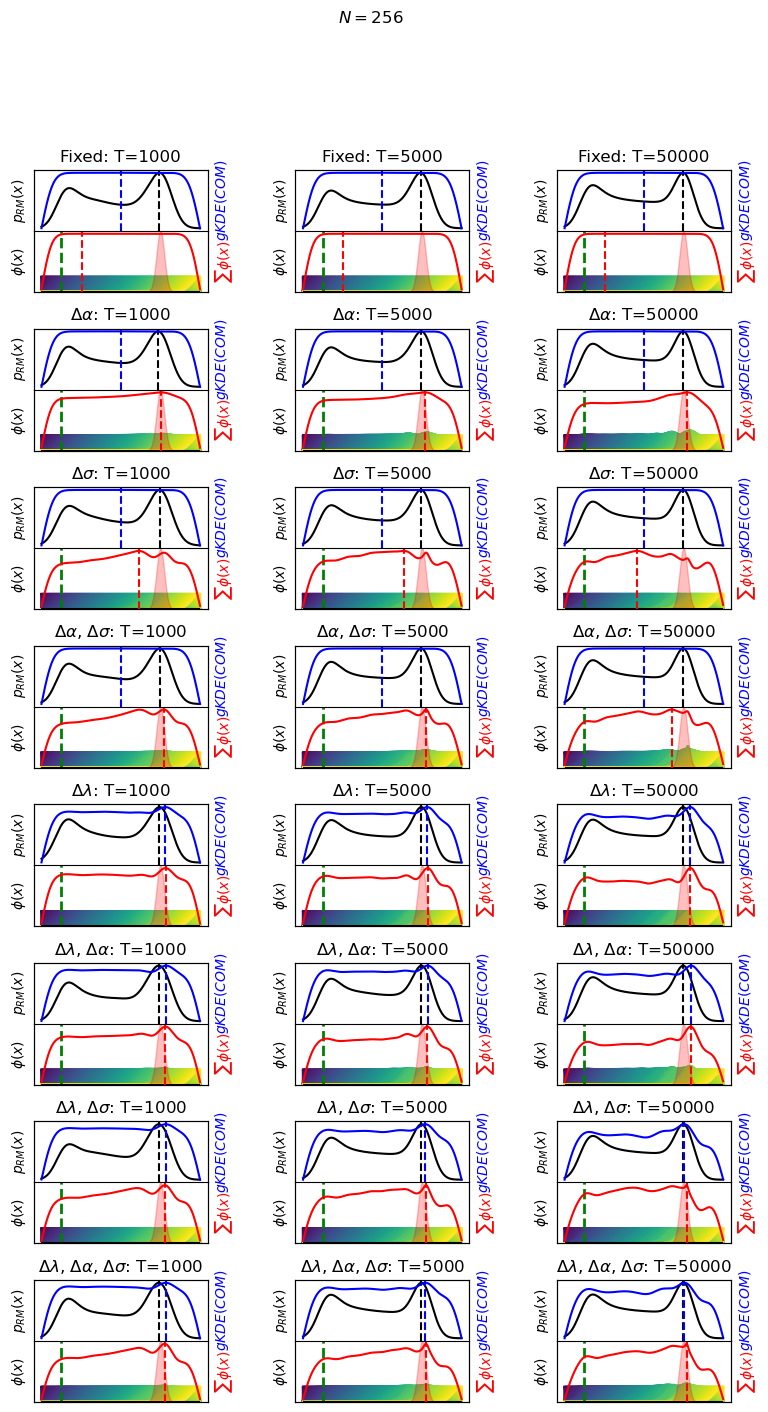

In [10]:
npc = 256

# plot example field 
f,ax = plt.subplots(8,3,figsize=(3*3,8*2)) 
f.suptitle(f'$N={npc}$')
# f.suptitle(f'$N={len(logparams[0][0])}$')
plt.subplots_adjust(hspace=0.3) 
ltypes = [0.0, 0.0001]
trials = [1000, 5000, 50000]
pcinit = 'uni'
names_dict = {'llr': r'$\Delta\lambda$', 'alr': r'$\Delta\alpha$', 'slr': r'$\Delta\sigma$'}
i = 0
for llr in ltypes:
    for slr in ltypes:
        for alr in ltypes:

            try:
                exptname = f"/data/dx_data/full_1D_td_online_0.0ns_0p_{npc}n_0.01plr_0.01clr_{llr}llr_{alr}alr_{slr}slr_uni_0.5a_0.1s_0s_50000e_5rmax_0.05rsz"
                [logparams, latencys,cum_rewards, allcoords] = saveload(data_dir + exptname,1,"load")
                
                name_components = []
                if llr > 0:
                    name_components.append(names_dict['llr'])
                if alr > 0:
                    name_components.append(names_dict['alr'])
                if slr > 0:
                    name_components.append(names_dict['slr'])
                name = ', '.join(name_components) if name_components else 'Fixed'
                
                main_plot(allcoords, logparams, trials, parameter=name+': ', ax=ax[i])
                
                if i < 7:
                    for j in range(len(trials)):
                        ax[i,j].set_xticks([])
                        ax[i,j].set_xlabel([])
                i+=1

                # f.savefig(f'./svgs/1D_{pcinit}_{name}.svg')

            except FileNotFoundError: print('skip')
# f.tight_layout()
# f.savefig('./svgs/1D_field_dx_all_256.svg')